![](https://miro.medium.com/max/2000/1*KdvxqXIOkb9JY_BeUWvpxg.jpeg)

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

PCA is a very flexible tool and allows analysis of datasets that may contain, for example, multicollinearity, missing values, categorical data, and imprecise measurements. The goal is to extract the important information from the data and to express this information as a set of summary indices called principal components.

    So to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.

In a real scenario, we often get our datasets that are beyond 2 or 3 D (dimension). For us it is difficult to visualize and understand them because it has 100 and 1000 features.

Training ML models becomes difficult, time consuming and also very expensive to perform. In order to deal with this high dimensional problem, we have proposed the concept of PCA, where we mathematically filter out important features and those that we can omit.

Here we deal with reducing the dimension of datasets to facilitate data analysis of engineers. .

### What are principal components ?
A principal component is a normalized linear combination of the original predictors in a data set. In image above, PC1 and PC2 are the principal components. Let’s say we have a set of predictors as X¹, X²...,Xp

The principal component can be written as:

Z¹ = Φ¹¹X¹ + Φ²¹X² + Φ³¹X³ + .... +Φp¹Xp

where,

Z¹ is first principal component
Φp¹ is the loading vector comprising of loadings (Φ¹, Φ²..) of first principal component

**First principal component** is a linear combination of original predictor variables which captures the maximum variance in the data set. It determines the direction of highest variability in the data.

The first principal component results in a line which is closest to the data i.e. it minimizes the sum of squared distance between a data point and the line.

**Second principal component** (Z²) is also a linear combination of original predictors which captures the remaining variance in the data set and is uncorrelated with Z¹. In other words, the correlation between first and second component should is zero. It can be represented as:

Z² = Φ¹²X¹ + Φ²²X² + Φ³²X³ + .... + Φp2Xp

If the two components are uncorrelated, their directions should be orthogonal (image below). This image is based on a simulated data with 2 predictors

![](https://www.analyticsvidhya.com/wp-content/uploads/2016/03/2-1-e1458494877196.png)

## Implementation of PCA

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [5]:
#reading the csv data file
df =  pd.read_csv(r'C:\Users\hp\Desktop\data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.shape

(569, 33)

In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df = df.drop(['Unnamed: 32'],axis=1)

## Data analysis

In [10]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


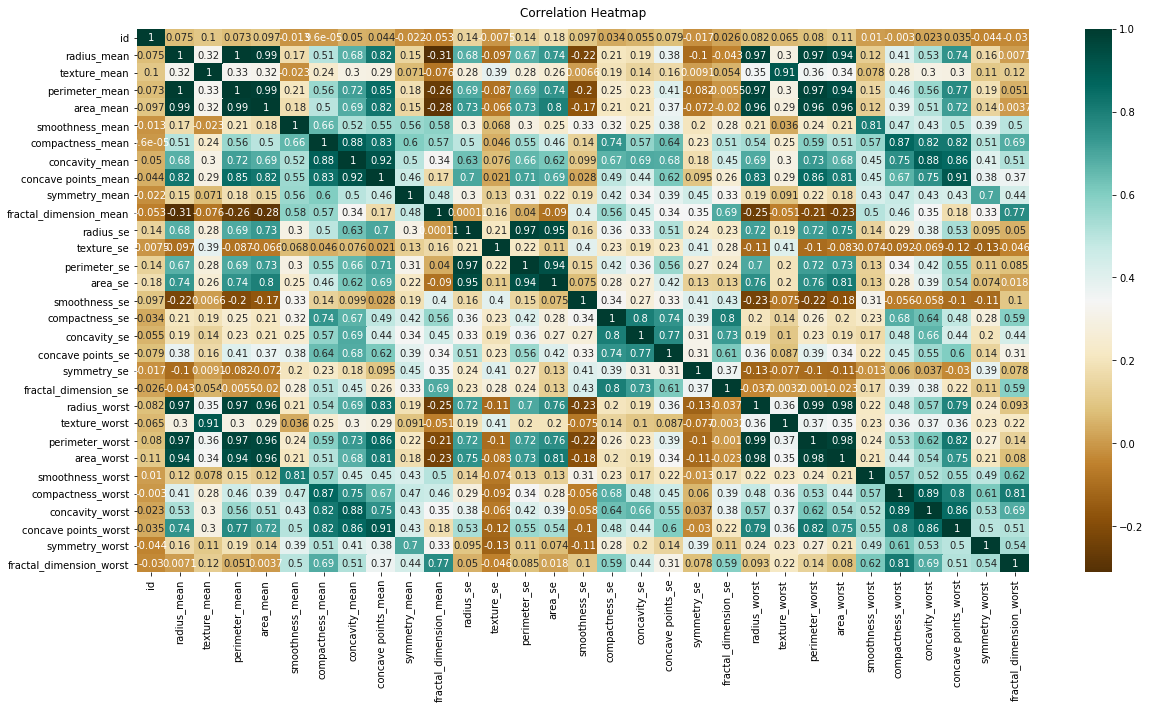

In [11]:
# PLOTTING HEATMAP FOR VISUALISING CORRELATION BETWEEN FEATURES
plt.figure(figsize=(20, 10))
heatmap = sb.heatmap(df.corr(),cmap='BrBG',annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

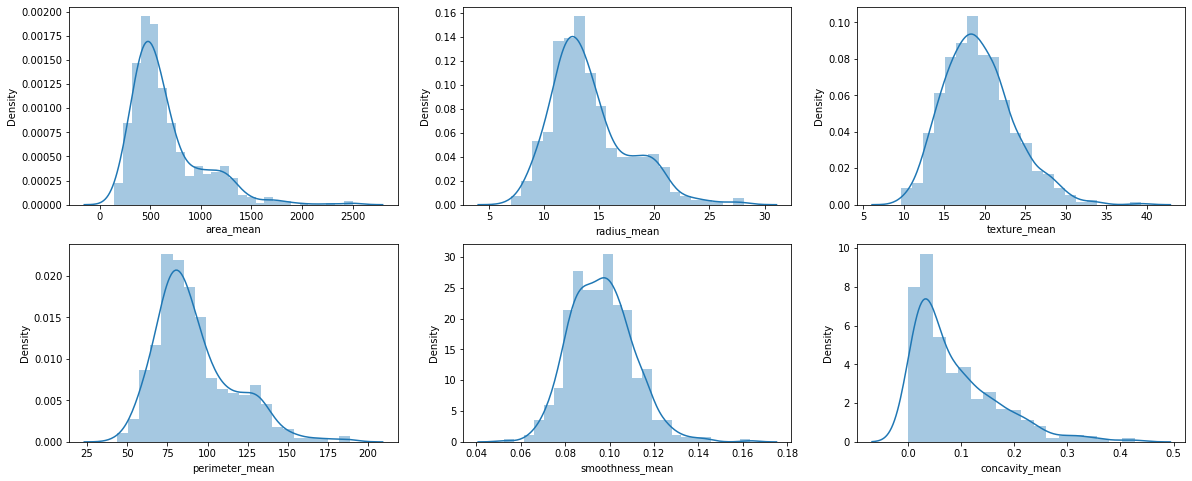

In [12]:
#CHECKING DISTRIBUTION OF DATA IN FEATURES
fig, axes = plt.subplots(2,3,figsize=(20,8))
sb.distplot(df['area_mean'],ax = axes[0,0])
sb.distplot(df['radius_mean'],ax = axes[0,1])
sb.distplot(df['texture_mean'],ax = axes[0,2])
sb.distplot(df['perimeter_mean'],ax = axes[1,0])
sb.distplot(df['smoothness_mean'],ax = axes[1,1])
sb.distplot(df['concavity_mean'],ax = axes[1,2])

In [13]:
#CONVERTING THE CATEGORICAL DATA TO NUMERICAL
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
scaled_data = scaler.transform(df)

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
x_pca = pca.transform(scaled_data)
scaled_data.shape, x_pca.shape

((569, 32), (569, 2))

In [19]:
pca_df = pd.DataFrame(data = x_pca, columns = ['principal component 1', 'principal component 2'])
pca_df

,principal component 1,principal component 2
0,9.216724,2.136750
1,2.651244,-3.770741
2,5.900697,-1.010916
3,7.137376,10.315636
4,4.139263,-1.916891
...,...,...
564,6.589934,-3.444874
565,4.020812,-3.546088
566,1.525754,-1.950552
567,10.395832,1.871229


## Visualising PCA

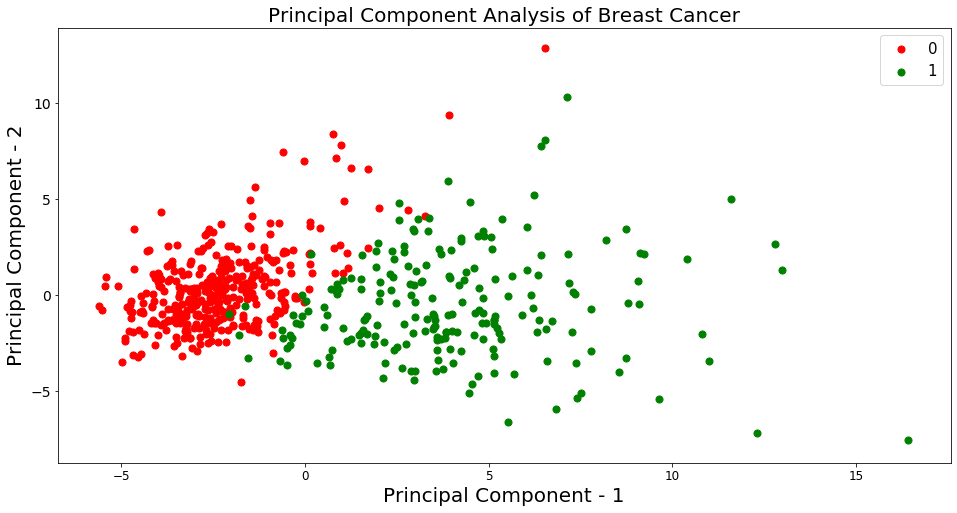

In [20]:
plt.figure(figsize=(16,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer",fontsize=20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['diagnosis'] == target
    plt.scatter(pca_df.loc[indicesToKeep, 'principal component 1']
               , pca_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

## Predictive Modelling

In [21]:
from sklearn.model_selection import train_test_split
X = df[['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se','compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst','symmetry_worst', 'fractal_dimension_worst']]
Y = df[['diagnosis']]

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

In [23]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((398, 30), (398, 1), (171, 30), (171, 1))

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [26]:
gbc.fit(X_train,Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [27]:
Y_gbc = gbc.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
acc_gbc = accuracy_score(Y_test, Y_gbc)
print('ACCURACY SCORE: ',acc_gbc)

ACCURACY SCORE:  0.9532163742690059


![](https://www.hebergementwebs.com/image/de/deaf3969d7b1738b3b87bba2bcd48655.webp/dimensionality-reduction-using-pca-a-comprehensive-practical-guidedimensionality-reduction-using-pca-a-comprehensive-practical-guide-0.webp)